In [1]:
import bilby as bb
import gwpopulation as gwpop
import matplotlib.pyplot as plt
import pandas as pd
from bilby.core.prior import PriorDict, Uniform
import os
import bilby
import numpy as np

In [2]:
#gwpop.set_backend("jax")

#xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

In [3]:
#netw = 'Asharp'
netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
#mass_band = 'above_80'
#outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
#                      netw, 'mass_bands', mass_band, 'run01_original_cov_mf_from_opt_SNR_injections_XPHM')
outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                      netw, 'run09_original_cov_mf_from_opt_SNR_injections_XPHM')

In [4]:
result = bilby.result.read_in_result(filename=os.path.join(outdir, f'{netw}_result.hdf5'))
#result = bilby.result.read_in_result(filename=os.path.join(outdir, 'CE4020ET123_result.hdf5'))

## Add the new parameter which is peak of the curve

In [5]:
def z_peak_new(gamma, kappa, z_peak):
    new_peak = (gamma/(kappa-gamma))**(1/kappa) * (1+z_peak) - 1
    return(new_peak)

In [6]:
true_params = {'gamma':1.8032, 'kappa':5.3023, 'z_peak':1.8362}
true_params['z_peak_new'] = z_peak_new(**true_params)

In [7]:
true_params

{'gamma': 1.8032,
 'kappa': 5.3023,
 'z_peak': 1.8362,
 'z_peak_new': 1.5028643466529545}

In [8]:
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak
0,2.458497,5.390643,34283.423601,-5.857933,1.460116
1,2.465359,5.706966,34284.645189,-5.857933,1.587278
2,1.250882,5.125598,34284.919344,-5.857933,1.996621
3,1.343185,5.197632,34285.224061,-5.857933,1.911318
4,1.299418,5.138378,34285.448982,-5.857933,1.949541
...,...,...,...,...,...
3110,2.035480,5.543208,34293.083833,-5.857933,1.667058
3111,2.048740,5.548254,34293.084670,-5.857933,1.664212
3112,2.050475,5.557805,34293.085516,-5.857933,1.663719
3113,2.012263,5.553865,34293.089416,-5.857933,1.688330


In [9]:
z_peak_new_posterior = z_peak_new(result.posterior['gamma'], 
                                  result.posterior['kappa'], 
                                  result.posterior['z_peak'])

In [10]:
result.posterior.loc[:, 'z_peak_new'] = z_peak_new_posterior

In [11]:
result.posterior.sort_values('z_peak_new')

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
8,1.918461,5.269660,34286.537957,-5.857933,1.574034,1.315496
32,2.301822,5.493078,34287.791617,-5.857933,1.459423,1.317409
25,1.966862,5.240054,34287.648361,-5.857933,1.556960,1.320124
108,2.316897,5.488098,34288.987136,-5.857933,1.465789,1.328720
115,2.269588,5.426497,34289.070350,-5.857933,1.475868,1.329792
...,...,...,...,...,...,...
117,1.683697,5.669832,34289.074356,-5.857933,1.931283,1.517931
59,1.656593,5.737171,34288.499697,-5.857933,1.947618,1.519017
15,1.878953,5.939433,34287.287009,-5.857933,1.869731,1.520551
48,1.611292,5.625401,34288.197790,-5.857933,1.969751,1.524941


### Remove outlier points if need be

In [76]:
result.posterior = result.posterior.sort_values('z_peak_new').dropna()
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
157,0.011529,1.929323,1579.582880,-5.857933,2.949747,-0.721142
262,0.014785,2.572708,1580.108782,-5.857933,3.101220,-0.446668
140,0.068045,1.981927,1579.477380,-5.857933,2.200532,-0.405632
111,0.095280,1.817720,1579.318198,-5.857933,1.928732,-0.404232
8,0.099871,2.425872,1577.547657,-5.857933,1.490459,-0.319699
...,...,...,...,...,...,...
118,0.315597,17.260988,1579.367375,-5.857933,3.446581,2.530246
100,0.318201,17.512808,1579.230991,-5.857933,3.466594,2.556624
18,0.212698,12.254146,1577.933581,-5.857933,3.974133,2.578251
109,0.315269,18.807536,1579.272431,-5.857933,3.459244,2.591204


In [77]:
ci99 = (result.posterior['z_peak_new'] > np.quantile(result.posterior['z_peak_new'], 0.99))
negative_vals = (result.posterior['z_peak_new'] < 0)
#drop_index = result.posterior[ci99 | negative_vals].index
drop_index = result.posterior[negative_vals].index

In [78]:
drop_index

Index([157, 262, 140, 111,   8, 120, 142, 259, 498, 230, 149, 292, 706, 312,
       248, 150,  40, 124, 173,  70, 148, 114],
      dtype='int64')

In [79]:
result.posterior = result.posterior.drop(index=drop_index)
result.posterior

,gamma,kappa,log_likelihood,log_prior,z_peak,z_peak_new
182,0.177003,1.871087,1579.742082,-5.857933,2.399387,0.016554
766,0.010014,4.666346,1581.099974,-5.857933,2.878542,0.040003
449,0.030052,3.339365,1580.580553,-5.857933,3.299248,0.051812
304,0.038914,2.946045,1580.235967,-5.857933,3.568026,0.056425
265,0.103682,2.874728,1580.116088,-5.857933,2.348521,0.067775
...,...,...,...,...,...,...
118,0.315597,17.260988,1579.367375,-5.857933,3.446581,2.530246
100,0.318201,17.512808,1579.230991,-5.857933,3.466594,2.556624
18,0.212698,12.254146,1577.933581,-5.857933,3.974133,2.578251
109,0.315269,18.807536,1579.272431,-5.857933,3.459244,2.591204


### Plot corner

In [12]:
true_params

{'gamma': 1.8032,
 'kappa': 5.3023,
 'z_peak': 1.8362,
 'z_peak_new': 1.5028643466529545}

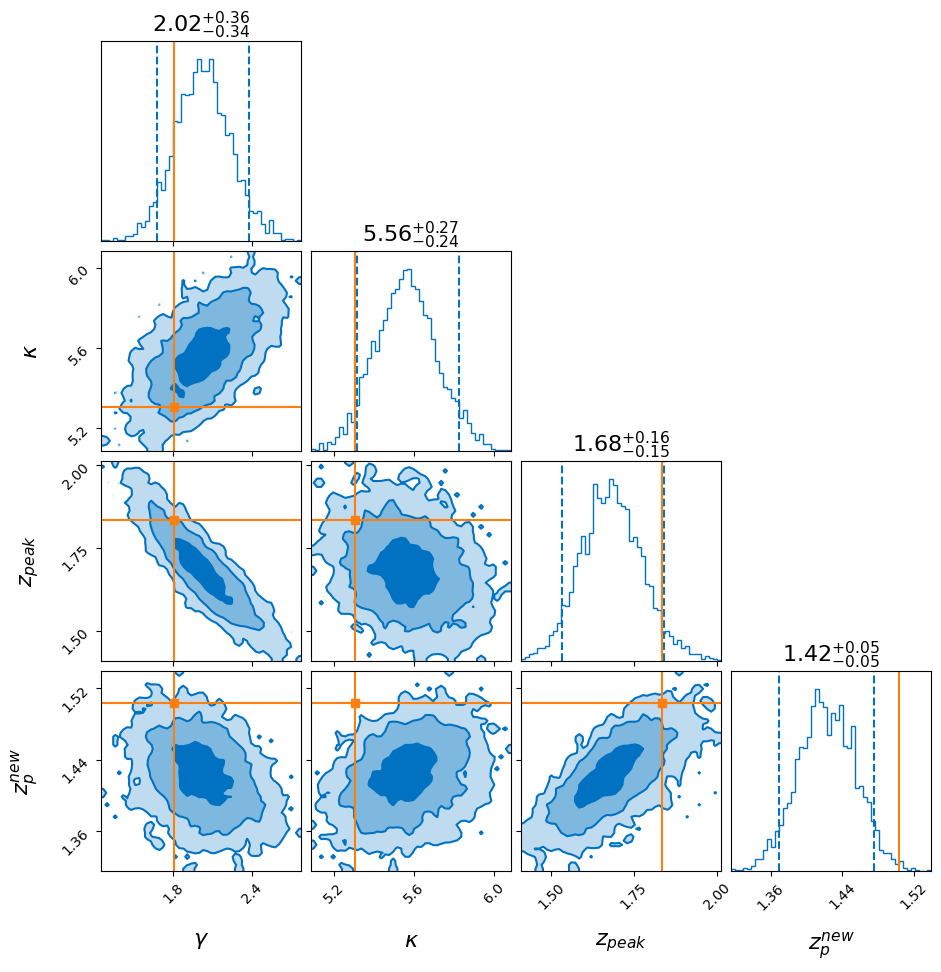

In [13]:
#result.plot_corner(parameters=list(true_params.keys()), outdir=outdir)
filename = f'{netw}_corner_with_truths.png'
#filename = 'CE4020ET123_corner_with_truths.png'
result.plot_corner(parameters=true_params, outdir=outdir, 
                   quantiles=(0.05, 0.95), 
                   filename=os.path.join(outdir, filename), labels=['$\\gamma$', '$\\kappa$', '$z_{peak}$', '$z_{p}^{new}$'])

## Calculate variance

In [14]:
gwpop.set_backend("jax")
from gwpopulation.experimental.jax import JittedLikelihood, NonCachingModel
import jax

xp = gwpop.utils.xp

project_dir = '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/'
#project_dir = '/home/divyajyoti.nln/Cardiff_University/Next_gen_detectability/A-sharp-study/'

/home/divyajyoti/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/divyajyoti/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/htcondor/__init__.py:49: UserWarning: Neither the environment variable CONDOR_CONFIG, /etc/condor/, /usr/local/etc/, nor ~condor/ contain a condor_config source. Therefore, we are using a null condor_config.
  _warnings.warn(message)


In [15]:
#netw = 'Asharp'
netw = 'CE4020ET123'
#mass_band = 'below_40'
#mass_band = '40-80'
#mass_band = 'above_80'
#outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
#                      netw, 'mass_bands', mass_band, 'run03_original_cov_mf_from_opt_SNR_injections_XPHM')
outdir = os.path.join(project_dir, 'gwpopulation', 'BBH', 'gwpop_analysis_results', 
                      netw, 'run09_original_cov_mf_from_opt_SNR_injections_XPHM')

In [16]:
result = bilby.result.read_in_result(filename=os.path.join(outdir, f'{netw}_result.hdf5'))
#result = bilby.result.read_in_result(filename=os.path.join(outdir, 'CE4020ET123_result.hdf5'))

In [17]:
with open(os.path.join(outdir, 'README.txt'), 'r') as f:
    lines = [line.rstrip('\n').strip('\t') for line in f]
readme_dict = {}
for line in lines:
    words = line.split()
    if 'Posterior' in words:
        readme_dict['posterior_file'] = words[-1].replace('divyajyoti.nln/', 'divyajyoti/ACADEMIC/Projects/')
    elif 'Injections' in words:
        readme_dict['injections_file'] = words[-1].replace('divyajyoti.nln/', 'divyajyoti/ACADEMIC/Projects/')

In [18]:
readme_dict

{'posterior_file': '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/CE4020ET123_CoBA10_2_PLP_z_MD_zmax_10_lmrd_22_no_spins_set3_z_posteriors_10K_original_cov_4344_events_pop_from_XPHM2.pkl',
 'injections_file': '/home/divyajyoti/ACADEMIC/Projects/Cardiff_University/Next_gen_detectability/A-sharp-study/gwpopulation/BBH/injections/CE4020ET123_CoBA10_SNR_2_pop_PLP_spin_prec_z_MD_zmax_10_lmrd_22_corrected_td_detected_injs_mf_from_opt_SNR_2M_points_XPHM.pkl'}

In [19]:
# ## Load posteriors
posteriors = pd.read_pickle(readme_dict['posterior_file'])

In [20]:
# ## Load injections

import dill
from tqdm import tqdm

with open(readme_dict['injections_file'], "rb") as ff:
    injections = dill.load(ff)

In [21]:
z_max = 10
model = NonCachingModel(
    model_functions=[gwpop.models.redshift.MadauDickinsonRedshift(cosmo_model="Planck18", z_max=z_max)],
    #model_functions=[gwpop.models.redshift.PowerLawRedshift(z_max=8)],
)

vt = gwpop.vt.ResamplingVT(model=model, data=injections, n_events=len(posteriors))

likelihood = gwpop.hyperpe.HyperparameterLikelihood(
    posteriors=posteriors,
    hyper_prior=model,
    selection_function=vt,
)

priors = PriorDict()
priors['gamma'] = Uniform(minimum=0, maximum=5, latex_label="$\\gamma$")
priors['kappa'] = Uniform(minimum=0, maximum=20, latex_label="$\\kappa$")
priors['z_peak'] = Uniform(minimum=0.5, maximum=4, latex_label="$z_{peak}$")

parameters = priors.sample()
likelihood.parameters.update(parameters)

In [22]:
likelihood.ln_likelihood_and_variance()

(Array(34256.10390821, dtype=float64), Array(0.50195247, dtype=float64))

In [23]:
func = jax.jit(likelihood.generate_extra_statistics)
#func = jax.jit(likelihood.ln_likelihood_and_variance)

In [ ]:
test_full_posterior = pd.DataFrame(
    [func(parameters) for parameters in tqdm(result.posterior.to_dict(orient="records"))]
).astype(float)

2025-07-23 10:23:51.800095: E external/xla/xla/service/slow_operation_alarm.cc:73] Constant folding an instruction is taking > 1s:                             | 0/3115 [00:00<?, ?it/s]

  %conditional.18.clone = (f64[4344,10000]{1,0}) conditional(%constant.585, %tuple.48, %tuple.49), branch_computations={%region_13.1540, %region_14.1582}, metadata={op_name="jit(generate_extra_statistics)/jit(main)/jit(differential_comoving_volume)/jit(comoving_distance)/jit(indefinite_integral)/cond" source_file="/tmp/ipykernel_5560/3874645480.py" source_line=1}

This isn't necessarily a bug; constant-folding is inherently a trade-off between compilation time and speed at runtime. XLA has some guards that attempt to keep constant folding from taking too long, but fundamentally you'll always be able to come up with an input program that takes a long time.

If you'd like to file a bug, run with envvar XLA_FLAGS=--xla_dump_to=/tmp/foo and attach the results.
2025-07-23 10:23:54.115709: E external/xla/xla/

In [91]:
test_full_posterior[result.search_parameter_keys + ["log_likelihood", "variance"]].corr()

,gamma,kappa,z_peak,log_likelihood,variance
gamma,1.000000,-0.347326,-0.862106,0.367915,-0.181012
kappa,-0.347326,1.000000,0.549604,-0.263843,0.093107
z_peak,-0.862106,0.549604,1.000000,-0.430483,0.044627
log_likelihood,0.367915,-0.263843,-0.430483,1.000000,-0.449758
variance,-0.181012,0.093107,0.044627,-0.449758,1.000000


In [93]:
pd.plotting.scatter_matrix(
    test_full_posterior[["gamma", "kappa", "z_peak", "log_likelihood", "variance"]],
    alpha=0.1,
)
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'param_variance_matrix.png'), dpi=300)

/home/divyajyoti/miniconda3/envs/gwpopulation/lib/python3.11/site-packages/pandas/plotting/_matplotlib/tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)
